In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

In [2]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]
refnameset,refdictset = [],[]

refsortset = []
sortset = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and '._' not in filename:
        if 'REF' not in filename:
            impath = os.path.join(directory, filename)
            nameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            dictset.append(this_set)
            sortset.append((impath, this_set))
        else:
            impath = os.path.join(directory, filename)
            refnameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            refdictset.append(this_set)
            refsortset.append((impath, this_set))
    
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))
truncator = len(nameset)

nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(n[1])

1322 1322
30 30


In [3]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#'''
nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))
    
refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(remove_dangling_children(n[1]))
#'''

In [4]:
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))

1322 1322
30 30


In [5]:
#part 1 of common node
refnodelist = set(refdictset[0])
for n in refdictset:
    refnodelist = set(n).intersection(refnodelist)

In [6]:
#part 2 of common node
newdictset = []
for n in refdictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
refdictset = newdictset

In [7]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [8]:
#scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
#globalscrambledictset = globalize(scrambledictset)

#refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
#refglobalscrambledictset = globalize(refscrambledictset)

In [9]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

match_links = []
match_links2 = []

findit = 0
notin = 0

o = 0
for n in range(0,df.shape[0]):
    #print(rdf.iloc[n][1] in nameset[o])
    if rdf.iloc[n][1] in nameset[o]:
        #match_links.append((o,n)) #, o in nameset, #n in dataframe
        match_links.append(n) #index is o in nameset, list value is n in dataframe
        tagref = 0
        for nm in list(globaldictset[o]):
            if cuttags[tagref] not in nm:
                try:
                    tagref = tagref + 1
                    if tagref > 6:
                        break
                except:
                    break
            #findit = findit + (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5])
            if (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5]): 
                #print(nameset[o].split('/')[-1])
                print(rdf.iloc[n][1])
                print('tag',o,'embryo',n,nm,globaldictset[o][nm],rdf.iloc[n][rearranger[tagref]+5])
                del dictset[o][nm]
        o = o + 1
    else:
        pass
        match_links2.append((o,-1))
        #match_links2.append(-1)
o,n

CUL-1_HYP_E0250
tag 239 embryo 248 ABarppaaaa 185 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppaapa 170 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppapaa 171 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppapap 176 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppappa 173 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppappp 191 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppaaa 184 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppaap 178 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppapa 179 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppapp 183 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppppaa 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppppap 171 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppppa 176 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppppp 181 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplappaap 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplappapa 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplapppaa 178 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplapppap 184 170
CUL-1_HYP_E0250
tag 239 embr

(1322, 1367)

In [10]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)

In [12]:
def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

def jaccard_distance(dict1,dict2):
    onion = len(set(dict1).union(set(dict2)))
    entry = len(set(dict1).intersection(set(dict2)))
    #print((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    return ((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

In [22]:
def self_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    imp_mat = np.tril(np.array(imp_mat)).flatten()
    imp_mat = imp_mat[np.where(imp_mat != 0.0)]
    return imp_mat.tolist()

def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat).flatten()
    #imp_mat = np.tril(np.array(imp_mat)).flatten()
    #imp_mat = imp_mat[np.where(imp_mat != 0.0)]
    return imp_mat.tolist()[0]

In [16]:
fullnameset = refnameset + nameset
fulldictset = refdictset + dictset

In [17]:
b_mat = []
size_edit_mat = []
t_mat = []
for n in range(0,len(fullnameset)):
    t_row = []
    r_row = []
    b_row = []
    for m in range(0,len(fullnameset)):
        #go = cleaner(refdictset,refglobaldictset,m,match_links,dictset,globaldictset,n)
        go = fulldictset[m]
        r_row.append(len(go))
        t_row.append(tree_edit_distance(go,fulldictset[n]))
        b_row.append(branch_distance(go,fulldictset[n]))
    size_edit_mat.append(r_row)
    t_mat.append(t_row)
    b_mat.append(b_row)
    if n % 20 == 0: print(n/len(fullnameset))
size_edit_mat = np.mat(size_edit_mat)

0.0
0.014792899408284023
0.029585798816568046
0.04437869822485207
0.05917159763313609
0.07396449704142012
0.08875739644970414
0.10355029585798817
0.11834319526627218
0.13313609467455623
0.14792899408284024
0.16272189349112426
0.17751479289940827
0.19230769230769232
0.20710059171597633
0.22189349112426035
0.23668639053254437
0.2514792899408284
0.26627218934911245
0.28106508875739644
0.2958579881656805
0.3106508875739645
0.3254437869822485
0.34023668639053256
0.35502958579881655
0.3698224852071006
0.38461538461538464
0.3994082840236686
0.41420118343195267
0.4289940828402367
0.4437869822485207
0.45857988165680474
0.47337278106508873
0.4881656804733728
0.5029585798816568
0.5177514792899408
0.5325443786982249
0.5473372781065089
0.5621301775147929
0.5769230769230769
0.591715976331361
0.606508875739645
0.621301775147929
0.636094674556213
0.650887573964497
0.665680473372781
0.6804733727810651
0.6952662721893491
0.7100591715976331
0.7248520710059172
0.7396449704142012
0.7544378698224852
0.76923

In [19]:
b_mat = np.mat(b_mat)
branch_comp = b_mat

In [23]:
self_comp(b_mat)

[60.473134530963414,
 37.416573867739416,
 69.66347680097513,
 37.62977544445356,
 70.9154426059656,
 33.075670817082454,
 36.60601043544625,
 64.33506042586733,
 33.28663395418648,
 32.984845004941285,
 36.22154055254967,
 76.05918747922567,
 36.02776706930364,
 35.09985754956849,
 36.27671429443411,
 30.95157508108432,
 53.33854141237835,
 39.11521443121589,
 42.7551166528639,
 38.600518131237564,
 45.32107677449864,
 27.94637722496424,
 52.459508194416,
 37.64306044943742,
 39.96248240537617,
 38.22302970723278,
 40.65710270051225,
 30.24896692450835,
 53.879495172096775,
 32.526911934581186,
 61.927376821564145,
 64.11708040764177,
 57.28001396647874,
 69.86415389883427,
 46.89349635077342,
 46.62617290749907,
 43.81780460041329,
 36.207733980463345,
 53.47896782848375,
 55.263007518592396,
 49.07137658554119,
 59.14389233048498,
 38.07886552931954,
 38.3275357934736,
 31.22498999199199,
 52.172789842982326,
 30.93541659651604,
 58.65151319446072,
 60.876925020897694,
 54.166410255

In [24]:
out_comp(b_mat)

[0.0,
 60.473134530963414,
 37.416573867739416,
 37.62977544445356,
 36.60601043544625,
 36.22154055254967,
 30.95157508108432,
 27.94637722496424,
 53.879495172096775,
 43.81780460041329,
 52.172789842982326,
 33.51119216023208,
 28.35489375751565,
 37.603191353926334,
 33.36165463522455,
 31.85906464414798,
 43.09292285283048,
 58.42944463196617,
 33.075670817082454,
 54.954526656136345,
 72.56721022610694,
 33.94112549695428,
 35.270384177096794,
 35.2845575287547,
 36.124783736376884,
 41.88078318274385,
 53.41348144429457,
 39.84971769034255,
 37.589892258425,
 43.255057507764334,
 125.45517127643643,
 149.95332607181476,
 62.601916903558156,
 51.60426338976267,
 78.08328886515987,
 78.79720807236764,
 287.0749031176358,
 402.031093324882,
 706.5033616338991,
 309.9387036173443,
 339.17841912480225,
 402.44751210561606,
 164.6754383628597,
 150.12328267127654,
 81.87185108448446,
 68.45436436049933,
 121.89339604752999,
 93.0,
 87.51571287488893,
 86.09297300012354,
 110.299592021

In [25]:
b_mat.shape

(1352, 1352)

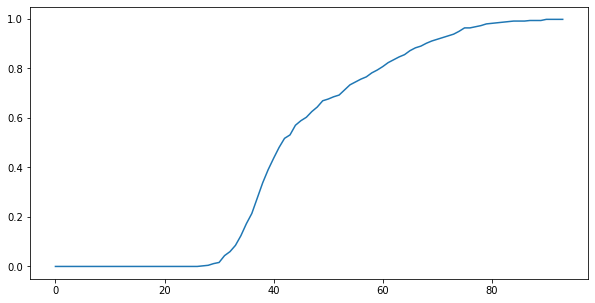

In [113]:
WT_distance_list = np.array(self_comp(b_mat[range(0,30)].T[range(0,30)]))

homogeneity_vs_epsilon = []

for n in range(0,int(max(WT_distance_list)+1)):
    homogeneity_vs_epsilon.append(len(np.where(WT_distance_list < n)[0]) / len(WT_distance_list) )

plt.plot(homogeneity_vs_epsilon)

full_homogeneity_vs_epsilon = list(homogeneity_vs_epsilon)

In [114]:
outlier_ref = [1, 8, 9, 10, 16, 17, 19, 20, 26]
inlier_ref = [0, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29]

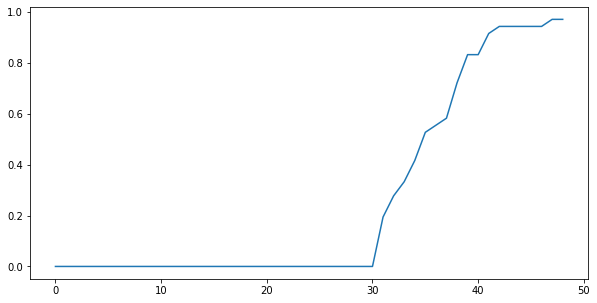

In [115]:
WT_distance_list = np.array(self_comp(b_mat[outlier_ref].T[outlier_ref]))

homogeneity_vs_epsilon = []

for n in range(0,int(max(WT_distance_list)+1)):
    homogeneity_vs_epsilon.append(len(np.where(WT_distance_list < n)[0]) / len(WT_distance_list) )

plt.plot(homogeneity_vs_epsilon)

outlier_homogeneity_vs_epsilon = list(homogeneity_vs_epsilon)

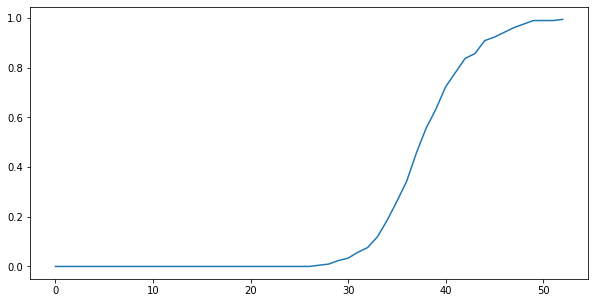

In [116]:
WT_distance_list = np.array(self_comp(b_mat[inlier_ref].T[inlier_ref]))

homogeneity_vs_epsilon = []

for n in range(0,int(max(WT_distance_list)+1)):
    homogeneity_vs_epsilon.append(len(np.where(WT_distance_list < n)[0]) / len(WT_distance_list) )

plt.plot(homogeneity_vs_epsilon)

inlier_homogeneity_vs_epsilon = list(homogeneity_vs_epsilon)

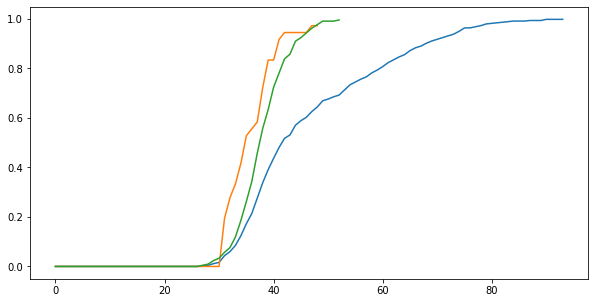

In [117]:
plt.plot(full_homogeneity_vs_epsilon)
plt.plot(outlier_homogeneity_vs_epsilon)
plt.plot(inlier_homogeneity_vs_epsilon)

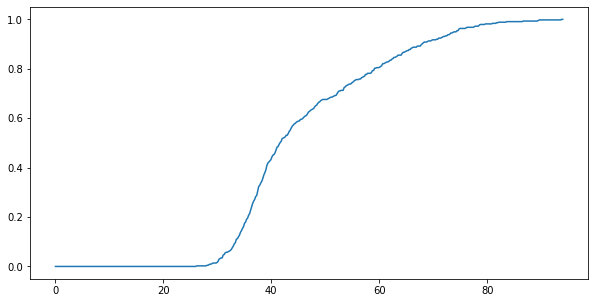

In [148]:


WT_distance_list = np.array(self_comp(b_mat[range(0,30)].T[range(0,30)]))

maxcap = int(max(WT_distance_list)+1)

homogeneity_vs_epsilon = []

for n in np.linspace(0,maxcap, num=500):
    homogeneity_vs_epsilon.append(len(np.where(WT_distance_list < n)[0]) / len(WT_distance_list) )

plt.plot(np.linspace(0,maxcap, num=500),homogeneity_vs_epsilon)

full_homogeneity_vs_epsilon = list(homogeneity_vs_epsilon)

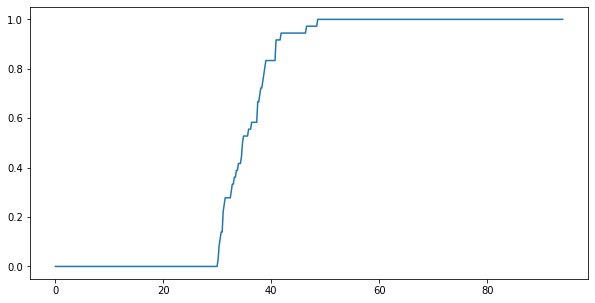

In [149]:
WT_distance_list = np.array(self_comp(b_mat[outlier_ref].T[outlier_ref]))

homogeneity_vs_epsilon = []

for n in np.linspace(0,maxcap, num=500):
    homogeneity_vs_epsilon.append(len(np.where(WT_distance_list < n)[0]) / len(WT_distance_list) )

plt.plot(np.linspace(0,maxcap, num=500), homogeneity_vs_epsilon)

outlier_homogeneity_vs_epsilon = list(homogeneity_vs_epsilon)

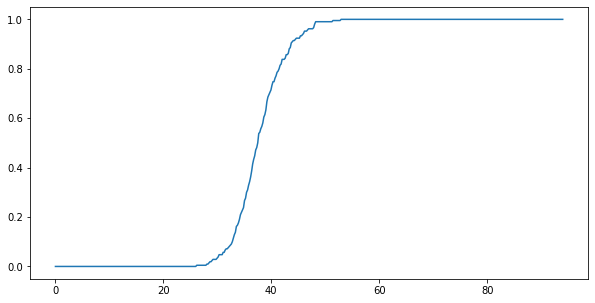

In [150]:
WT_distance_list = np.array(self_comp(b_mat[inlier_ref].T[inlier_ref]))

homogeneity_vs_epsilon = []

for n in np.linspace(0,maxcap, num=500):
    homogeneity_vs_epsilon.append(len(np.where(WT_distance_list < n)[0]) / len(WT_distance_list) )

plt.plot(np.linspace(0,maxcap, num=500),homogeneity_vs_epsilon)

inlier_homogeneity_vs_epsilon = list(homogeneity_vs_epsilon)

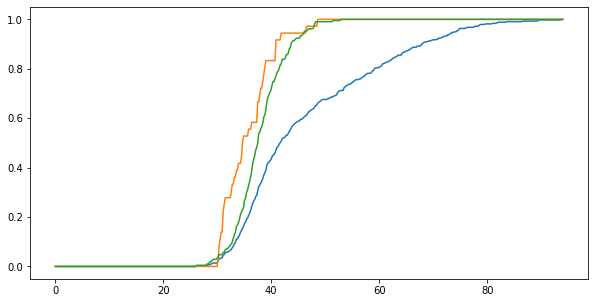

In [152]:
plt.plot(np.linspace(0,maxcap, num=500),full_homogeneity_vs_epsilon)
plt.plot(np.linspace(0,maxcap, num=500),outlier_homogeneity_vs_epsilon)
plt.plot(np.linspace(0,maxcap, num=500),inlier_homogeneity_vs_epsilon)

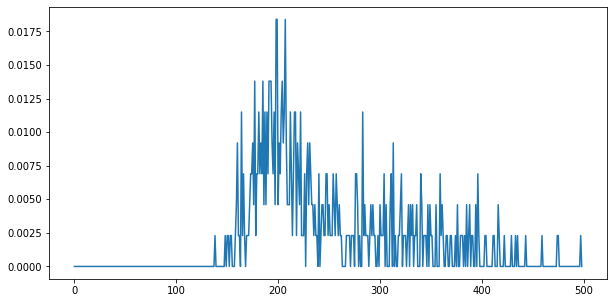

In [153]:
plt.plot(np.diff(full_homogeneity_vs_epsilon))

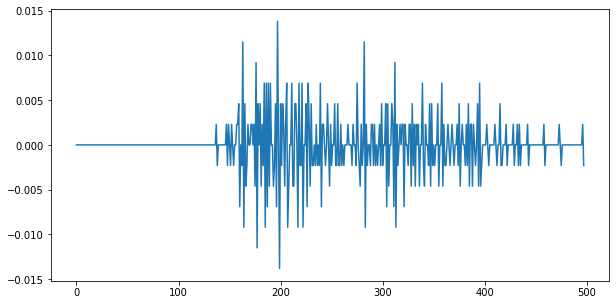

In [154]:
plt.plot(np.diff(np.diff(full_homogeneity_vs_epsilon)))

In [129]:
q = q + u

In [135]:
q = np.random.multivariate_normal((0,0), ((1,0),(0,1)), 10)
u = np.random.multivariate_normal((-1,1), ((1,0),(0,1)), 10)

from scipy.spatial import distance_matrix

distance_matrix(q,q)

array([[0.        , 1.20157101, 1.43601496, 1.14074819, 1.20376042,
        1.83385969, 2.78130294, 2.52395984, 1.54625607, 2.119606  ],
       [1.20157101, 0.        , 0.39879864, 2.00291271, 1.87620573,
        0.97893854, 2.34961315, 1.38004948, 0.90805798, 2.31681791],
       [1.43601496, 0.39879864, 0.        , 2.03058978, 1.84816121,
        1.26095321, 1.98183776, 1.08854956, 0.5739827 , 2.10262553],
       [1.14074819, 2.00291271, 2.03058978, 0.        , 0.31219263,
        2.85664509, 2.43560678, 3.0188891 , 1.78272384, 1.33476749],
       [1.20376042, 1.87620573, 1.84816121, 0.31219263, 0.        ,
        2.78356309, 2.12348474, 2.78700013, 1.53724967, 1.05591729],
       [1.83385969, 0.97893854, 1.26095321, 2.85664509, 2.78356309,
        0.        , 3.22210827, 1.69498631, 1.83366349, 3.29573002],
       [2.78130294, 2.34961315, 1.98183776, 2.43560678, 2.12348474,
        3.22210827, 0.        , 1.99297583, 1.4463773 , 1.3046634 ],
       [2.52395984, 1.38004948, 1.0885495

In [132]:
distance_matrix(q,q).shape

#np.array(self_comp(b_mat[range(0,30)].T[range(0,30)]))

(100, 100)

In [136]:
q

array([[ 0.51433137, -0.78783146],
       [ 0.8716091 ,  0.35939367],
       [ 0.59426155,  0.64595727],
       [-0.60831855, -0.99022607],
       [-0.68525405, -0.68766175],
       [ 1.84363903,  0.47549055],
       [-1.25529124,  1.35788097],
       [ 0.70281068,  1.7290811 ],
       [ 0.02115541,  0.67766686],
       [-1.42636223,  0.06448184]])

In [137]:
u

array([[-0.37716211,  1.89166614],
       [-1.12623919,  1.89669341],
       [-2.39078549,  0.90122975],
       [-1.05187729,  0.31125596],
       [-0.80730826,  1.635126  ],
       [-0.93345583,  1.6116378 ],
       [-0.77872732, -1.08264074],
       [-1.43509176, -1.75878936],
       [-1.64890119, -0.22897015],
       [-2.10668142, -1.26182286]])

In [139]:
np.concatenate(q,u)

TypeError: only integer scalar arrays can be converted to a scalar index